In [1]:
%matplotlib inline
import pandas as pd
from pandas import *

import numpy as np
from sklearn.cross_validation import * 

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets, linear_model

import sklearn.linear_model as skl
from sklearn.linear_model import *

from sklearn.metrics import mean_squared_error
from math import sqrt

import statsmodels.api as sm

import statsmodels.formula.api as smf

from sklearn import svm

In [2]:
train = pd.read_csv("D://Data Science//Rossmann//train.csv")
test = pd.read_csv("D://Data Science//Rossmann//test.csv")
store = pd.read_csv("D://Data Science//Rossmann//store.csv")

C:\Users\jagpr\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("*** TRAIN INFO ***")
train.info()
print("*** TEST INFO ***")
test.info()
print("*** STORE INFO ***")
store.info()

*** TRAIN INFO ***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB
*** TEST INFO ***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), in

In [4]:
#Splitting data into train and validation.

validation = pd.DataFrame(train.sort(['Date'], ascending=[True])[1000001:])
train = pd.DataFrame(train.sort(['Date'], ascending=[True])[:1000000])

C:\Users\jagpr\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\jagpr\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [5]:
validation.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
17590,866,4,2015-07-16,7591,537,1,1,0,0
17589,865,4,2015-07-16,7545,616,1,1,0,1
17588,864,4,2015-07-16,4384,628,1,1,0,0
17587,863,4,2015-07-16,9829,1080,1,1,0,0
17586,862,4,2015-07-16,9579,1181,1,1,0,0


In [6]:
#Converting date into Year and Month.
train['Year']  = train['Date'].apply(lambda x: int(str(x)[:4]))
train['Month'] = train['Date'].apply(lambda x: int(str(x)[5:7]))
train['MonthYear'] = train['Date'].apply(lambda x: str(x)[:7])

validation['Year']  = validation['Date'].apply(lambda x: int(str(x)[:4]))
validation['Month'] = validation['Date'].apply(lambda x: int(str(x)[5:7]))
validation['MonthYear'] = validation['Date'].apply(lambda x: str(x)[:7])

In [7]:
pd.unique(validation.StateHoliday)
#Here 0 is a character.

array(['0'], dtype=object)

In [8]:
pd.unique(train.StateHoliday)
#Here 0 is a character and other characters like a,b and c.

array(['a', '0', 'b', 'c', 0L], dtype=object)

In [9]:
train.StateHoliday = train.StateHoliday.map({'a':1,'b':1,'c':1, 0:0, '0':0,1:1})
validation.StateHoliday = validation.StateHoliday.map({'a':1,'b':1,'c':1, 0:0, '0':0,1:1})

In [10]:
pd.unique(train.StateHoliday)

array([1, 0], dtype=int64)

In [11]:
pd.unique(train.SchoolHoliday)

array([1, 0], dtype=int64)

In [12]:
pd.unique(validation.StateHoliday)

array([0], dtype=int64)

In [13]:
traindf=pd.DataFrame(pd.merge(train, store, on='Store'))

In [14]:
validationdf=pd.DataFrame(pd.merge(validation,store,on='Store'))
#Using Merge function, I have merged the Store data with Validation and Train.

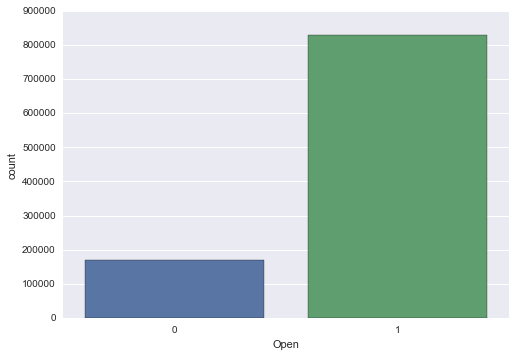

In [15]:
sns.countplot(x='Open', data=traindf)
#Stores which didn't open should have sales = 0

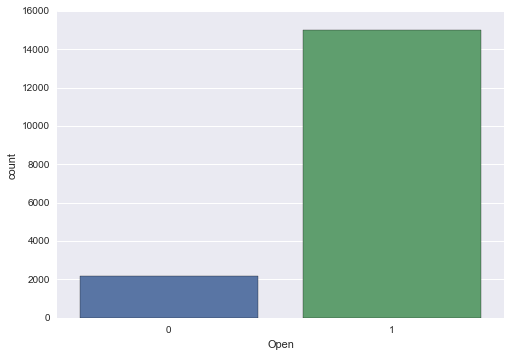

In [16]:
sns.countplot(x='Open', data=validationdf)
#Stores which didn't open should have sales = 0

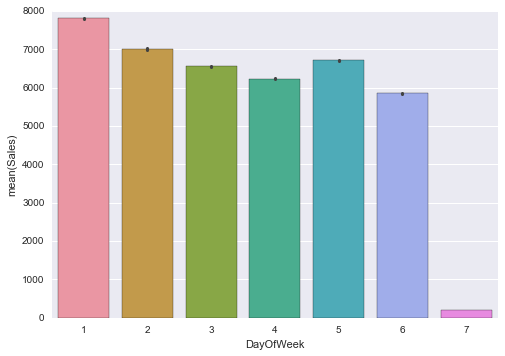

In [17]:
sns.barplot(x='DayOfWeek', y='Sales', data=traindf)
#It was seen that for Day = 7, there isn't much sale. Many stores remain close on those days.
#Therefore, it would be a safe way to fill NA values with sales = 0 for Day = 7.

In [18]:
pd.unique(traindf['PromoInterval'])

array(['Mar,Jun,Sept,Dec', nan, 'Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct'], dtype=object)

In [19]:
#Promo Interval has dtype of object and it would be nice if they are converted to dtype=category
traindf['PromoInterval']=traindf['PromoInterval'].astype('category')
validationdf['PromoInterval']=validationdf['PromoInterval'].astype('category')

In [20]:
pd.unique(traindf['StateHoliday'])

array([1, 0], dtype=int64)

In [21]:
#Removed Enteries for which Open = 0 as for them Sales = 0
validationOpendf=validationdf[validationdf['Open']!=0]

In [22]:
#Removed enteries for which Open =0 as for them Sales = 0
trainOpendf=traindf[traindf['Open']!=0]

In [23]:
#There are records for which despite being a StateHoliday, the Store was open.
pd.unique(trainOpendf['StateHoliday'])

array([0, 1], dtype=int64)

In [24]:
StoreOpenSaleZero=trainOpendf[(trainOpendf['Sales']==0)]
len(StoreOpenSaleZero)
#There are 54 stores which despite being open has sales = 0. Strange :P

54

In [25]:
ValidationStoreOpenSaleZero=validationOpendf[(validationOpendf['Sales']==0)]
ValidationStoreOpenSaleZero
# In validation data, there isn' any store for which sale = 0 and store = 1 (Open)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,MonthYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [26]:
# There are 54 stores for which despite the store being open, sale = 0.
# I'll consider these as outlier and remove it from TrainOpendf data
trainOpendf=trainOpendf[(trainOpendf['Sales']!=0)]

In [27]:
len(trainOpendf)
#I am left with 829393 records. Stores open and Sale Recorded.

829323

In [29]:
#Created a response variable i.e Sales
dependent=trainOpendf['Sales']

In [30]:
trainOpendf['DayOfWeek']=trainOpendf['DayOfWeek'].astype('int64')
trainOpendf['Open']=trainOpendf['Open'].astype('category')
trainOpendf['Promo']=trainOpendf['Promo'].astype('category')
trainOpendf['StateHoliday']=trainOpendf['StateHoliday'].astype('category')
trainOpendf['SchoolHoliday']=trainOpendf['SchoolHoliday'].astype('category')
trainOpendf['StoreType']=trainOpendf['StoreType'].astype('category')
trainOpendf['Assortment']=trainOpendf['Assortment'].astype('category')

In [31]:
trainOpendf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829323 entries, 1 to 999999
Data columns (total 21 columns):
Store                        829323 non-null int64
DayOfWeek                    829323 non-null int64
Date                         829323 non-null object
Sales                        829323 non-null int64
Customers                    829323 non-null int64
Open                         829323 non-null category
Promo                        829323 non-null category
StateHoliday                 829323 non-null category
SchoolHoliday                829323 non-null category
Year                         829323 non-null int64
Month                        829323 non-null int64
MonthYear                    829323 non-null object
StoreType                    829323 non-null category
Assortment                   829323 non-null category
CompetitionDistance          827178 non-null float64
CompetitionOpenSinceMonth    565492 non-null float64
CompetitionOpenSinceYear     565492 non-null floa

In [32]:
#Objective is to run for loop on each Store
trainOpen_dic = dict(list(trainOpendf.groupby('Store')))
validationOpen_dic = dict(list(validationOpendf.groupby('Store')))

In [33]:
for i in validationOpen_dic:
    Valid  = validationOpen_dic[i].copy()
    linearmodel = smf.ols(formula="Sales ~ Store + C(DayOfWeek) + Customers + C(Promo) + StoreType + Assortment + Promo2",data=trainOpen_dic[i]).fit()
    validationOpen_dic[i]['PreSales'] = linearmodel.predict(Valid)

In [34]:
validationwithprediction=pd.DataFrame(columns=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'MonthYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval','PreSales'])

In [35]:
validationwithprediction.columns

Index([u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open',
       u'Promo', u'StateHoliday', u'SchoolHoliday', u'Year', u'Month',
       u'MonthYear', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval', u'PreSales'],
      dtype='object')

In [36]:
for i in validationOpen_dic:
    validationwithprediction=validationwithprediction.append(validationOpen_dic[i][::])

In [45]:
RMSE = mean_squared_error(validationwithprediction['Sales'], validationwithprediction['PreSales'])**0.5
RMSE

611.42054852909223

In [40]:
squared={}
squaredvalue=0
for i in range(0,len(validationwithprediction),1):
    diff=validationwithprediction.iloc[i,3]-validationwithprediction.iloc[i,21]
    bracket=diff/validationwithprediction.iloc[i,3]
    squared[i]=bracket**2
    squaredvalue=squaredvalue+squared[i]
rmspe=sqrt(squaredvalue/len(validationwithprediction))
rmspe

#RMSPE = Root Mean Squared Percentage Error
# 8.2% RMSPE is obtained

0.08208926572587982

In [41]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
validationwithprediction.StoreType.replace(mappings, inplace=True)

In [42]:
#Support Vector Machine
for i in validationOpen_dic:
    Valid = validationOpen_dic[i][['Store','DayOfWeek','Customers','Promo','Promo2']]
    svmmodel = svm.SVR(C=0.5, epsilon=0.05, kernel='linear')
    svmmodel.fit(trainOpen_dic[i][['Store','DayOfWeek','Customers','Promo','Promo2']], trainOpen_dic[i]['Sales'])
    validationOpen_dic[i]['PreSalesSVM']=svmmodel.predict(Valid)

In [43]:
validationwithpredictionSVM=pd.DataFrame(columns=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'MonthYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval','PreSalesSVM'])

for i in validationOpen_dic:
    validationwithpredictionSVM=validationwithpredictionSVM.append(validationOpen_dic[i][::])
    
RMSE = mean_squared_error(validationwithpredictionSVM['Sales'], validationwithpredictionSVM['PreSalesSVM'])**0.5
RMSE

758.08176720164715

In [46]:
#Storetype and Assortment values are changed to numerical values.
trainOpendf.StoreType=trainOpendf.StoreType.map({'a':1,'b':2,'c':3,'d':4, 0:0, '0':0,1:1})
validationOpendf.StoreType=validationOpendf.StoreType.map({'a':1,'b':2,'c':3,'d':4, 0:0, '0':0,1:1})

trainOpendf.Assortment=trainOpendf.Assortment.map({'a':1,'b':2,'c':3,'d':4, 0:0, '0':0,1:1})
validationOpendf.Assortment=validationOpendf.Assortment.map({'a':1,'b':2,'c':3,'d':4, 0:0, '0':0,1:1})


C:\Users\jagpr\Anaconda2\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [47]:
#CompetitionOpenSinceYear and Months are converted to only Months
trainOpendf['CompetitionOpen'] = 12 * (trainOpendf.Year - trainOpendf.CompetitionOpenSinceYear) + (trainOpendf.Month - trainOpendf.CompetitionOpenSinceMonth)
validationOpendf['CompetitionOpen'] = 12 * (validationOpendf.Year - validationOpendf.CompetitionOpenSinceYear) + (validationOpendf.Month - validationOpendf.CompetitionOpenSinceMonth)

C:\Users\jagpr\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [48]:
# All the NAs values in the CompetitionOpen are filled with 0's
trainOpendf.CompetitionOpen.fillna(0,inplace=True)
validationOpendf.CompetitionOpen.fillna(0,inplace=True)

C:\Users\jagpr\Anaconda2\lib\site-packages\pandas\core\generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [49]:
trainOpendf['OnlyDate'] = trainOpendf['Date'].apply(lambda x: int(str(x)[8:10]))
validationOpendf['OnlyDate'] = validationOpendf['Date'].apply(lambda x: int(str(x)[8:10]))

C:\Users\jagpr\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
